# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../encoded_data/BPIC_2017_all_5_train.pkl'
# Load the dataset using torch.load
BPIC_17_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_train_dataset))

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../encoded_data/BPIC_2017_all_5_val.pkl'
# Load the dataset using torch.load
BPIC_17_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_val_dataset))

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# BPIC 17 Dataset Categories, Features:

bpic_17_all_categories = BPIC_17_train_dataset.all_categories

bpic_17_all_categories_cat = bpic_17_all_categories[0]
print(bpic_17_all_categories_cat)

bpic_17_all_categories_num = bpic_17_all_categories[1]
print(bpic_17_all_categories_num)

for i, cat in enumerate(bpic_17_all_categories_cat):
     print(f"BPIC 17 (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(bpic_17_all_categories_num):
     print(f"BPIC 17 (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Amount Category Lables: {num[1]}")

[('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 151, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'User_111': 16, 'User_112

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in bpic_17_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in bpic_17_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['concept:name', 'org:resource', 'lifecycle:transition']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name', 'Action', 'org:resource', 'EventOrigin', 'lifecycle:transition', 'case:LoanGoal', 'case:ApplicationType', 'Accepted', 'Selected'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day', 'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore']]
Features decoder:  [['concept:name', 'org:resource', 'lifecycle:transition'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
seq_len_pred = 4

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=bpic_17_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 151, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'U

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_BPIC17_grad")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-6

# Optimizer and Scheduler
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=1e-10)

# Epochs
num_epochs = 100

# BATCHING does not work currntly with custom implementation
batch_size = 256

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term = 1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more target events are used for next event prediction.
teacher_forcing_ratio = 0.8

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = 4

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=BPIC_17_train_dataset,
                  data_val=BPIC_17_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature= [],
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'BPIC_2017_full_grad_norm_new_2.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(28, 10)
    (1): Embedding(7, 5)
    (2): Embedding(151, 27)
    (3): Embedding(5, 4)
    (4): Embedding(9, 5)
    (5): Embedding(16, 8)
    (6): Embedding(4, 3)
    (7-8): 2 x Embedding(5, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(28, 10)
      (1): Embedding(7, 5)
      (2): Embedding(151, 27)
      (3): Embedding(5, 4)
      (4): Embedding(9, 5)
      (5): Embedding(16, 8)
      (6): Embedding(4, 3)
      (7-8): 2 x Embedding(5, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=79, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=79, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=79, out_features=128, bias=True)
      (Uc): Lin

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 14.0387


Validation: Avg Standard Validation Loss: 12.5863
Validation: Avg Attenuated Validation Loss: 12.9103
Validation Loss for Scheduler: 12.5863
saving model


Epoch [2/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 14.9641


Validation: Avg Standard Validation Loss: 11.8917
Validation: Avg Attenuated Validation Loss: 11.9458
Validation Loss for Scheduler: 11.8917
saving model


Epoch [3/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.7659


Validation: Avg Standard Validation Loss: 11.2053
Validation: Avg Attenuated Validation Loss: 10.7595
Validation Loss for Scheduler: 11.2053
saving model


Epoch [4/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.6764


Validation: Avg Standard Validation Loss: 10.9868
Validation: Avg Attenuated Validation Loss: 10.3352
Validation Loss for Scheduler: 10.9868
saving model


Epoch [5/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.2573


Validation: Avg Standard Validation Loss: 10.4928
Validation: Avg Attenuated Validation Loss: 9.7977
Validation Loss for Scheduler: 10.4928
saving model


Epoch [6/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.4791


Validation: Avg Standard Validation Loss: 10.2021
Validation: Avg Attenuated Validation Loss: 9.3699
Validation Loss for Scheduler: 10.2021
saving model


Epoch [7/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.8350


Validation: Avg Standard Validation Loss: 9.9892
Validation: Avg Attenuated Validation Loss: 9.0204
Validation Loss for Scheduler: 9.9892
saving model


Epoch [8/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.0659


Validation: Avg Standard Validation Loss: 9.8152
Validation: Avg Attenuated Validation Loss: 8.7211
Validation Loss for Scheduler: 9.8152
saving model


Epoch [9/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.1346


Validation: Avg Standard Validation Loss: 9.6687
Validation: Avg Attenuated Validation Loss: 8.4611
Validation Loss for Scheduler: 9.6687
saving model


Epoch [10/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 13.0401


Validation: Avg Standard Validation Loss: 9.5671
Validation: Avg Attenuated Validation Loss: 8.2688
Validation Loss for Scheduler: 9.5671
saving model


Epoch [11/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.9204


Validation: Avg Standard Validation Loss: 9.4859
Validation: Avg Attenuated Validation Loss: 8.1250
Validation Loss for Scheduler: 9.4859
saving model


Epoch [12/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.7887


Validation: Avg Standard Validation Loss: 9.3902
Validation: Avg Attenuated Validation Loss: 7.9860
Validation Loss for Scheduler: 9.3902
saving model


Epoch [13/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.6258


Validation: Avg Standard Validation Loss: 9.2670
Validation: Avg Attenuated Validation Loss: 7.8339
Validation Loss for Scheduler: 9.2670
saving model


Epoch [14/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.4616


Validation: Avg Standard Validation Loss: 9.1501
Validation: Avg Attenuated Validation Loss: 7.6911
Validation Loss for Scheduler: 9.1501
saving model


Epoch [15/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.3177


Validation: Avg Standard Validation Loss: 9.0355
Validation: Avg Attenuated Validation Loss: 7.5506
Validation Loss for Scheduler: 9.0355
saving model


Epoch [16/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 12.1490


Validation: Avg Standard Validation Loss: 8.9406
Validation: Avg Attenuated Validation Loss: 7.4338
Validation Loss for Scheduler: 8.9406
saving model


Epoch [17/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.9948


Validation: Avg Standard Validation Loss: 8.8453
Validation: Avg Attenuated Validation Loss: 7.3090
Validation Loss for Scheduler: 8.8453
saving model


Epoch [18/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.8200


Validation: Avg Standard Validation Loss: 8.7751
Validation: Avg Attenuated Validation Loss: 7.2150
Validation Loss for Scheduler: 8.7751
saving model


Epoch [19/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.6627


Validation: Avg Standard Validation Loss: 8.6987
Validation: Avg Attenuated Validation Loss: 7.1092
Validation Loss for Scheduler: 8.6987
saving model


Epoch [20/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.8
Training: Avg Attenuated Training Loss: 11.5046


Validation: Avg Standard Validation Loss: 8.6247
Validation: Avg Attenuated Validation Loss: 7.0169
Validation Loss for Scheduler: 8.6247
saving model


Epoch [21/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 11.3374


Validation: Avg Standard Validation Loss: 8.5497
Validation: Avg Attenuated Validation Loss: 6.9148
Validation Loss for Scheduler: 8.5497
saving model


Epoch [22/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 11.1779


Validation: Avg Standard Validation Loss: 8.4770
Validation: Avg Attenuated Validation Loss: 6.8167
Validation Loss for Scheduler: 8.4770
saving model


Epoch [23/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 11.0260


Validation: Avg Standard Validation Loss: 8.4082
Validation: Avg Attenuated Validation Loss: 6.7321
Validation Loss for Scheduler: 8.4082
saving model


Epoch [24/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.8513


Validation: Avg Standard Validation Loss: 8.3329
Validation: Avg Attenuated Validation Loss: 6.6400
Validation Loss for Scheduler: 8.3329
saving model


Epoch [25/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.6752


Validation: Avg Standard Validation Loss: 8.2505
Validation: Avg Attenuated Validation Loss: 6.5349
Validation Loss for Scheduler: 8.2505
saving model


Epoch [26/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.4804


Validation: Avg Standard Validation Loss: 8.1786
Validation: Avg Attenuated Validation Loss: 6.4454
Validation Loss for Scheduler: 8.1786
saving model


Epoch [27/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.2642


Validation: Avg Standard Validation Loss: 8.1084
Validation: Avg Attenuated Validation Loss: 6.3556
Validation Loss for Scheduler: 8.1084
saving model


Epoch [28/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 10.0550


Validation: Avg Standard Validation Loss: 8.0402
Validation: Avg Attenuated Validation Loss: 6.2620
Validation Loss for Scheduler: 8.0402
saving model


Epoch [29/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.8254


Validation: Avg Standard Validation Loss: 7.9601
Validation: Avg Attenuated Validation Loss: 6.1602
Validation Loss for Scheduler: 7.9601
saving model


Epoch [30/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.5539


Validation: Avg Standard Validation Loss: 7.8860
Validation: Avg Attenuated Validation Loss: 6.0528
Validation Loss for Scheduler: 7.8860
saving model


Epoch [31/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 9.2286


Validation: Avg Standard Validation Loss: 7.8057
Validation: Avg Attenuated Validation Loss: 5.9423
Validation Loss for Scheduler: 7.8057
saving model


Epoch [32/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 8.7732


Validation: Avg Standard Validation Loss: 7.7292
Validation: Avg Attenuated Validation Loss: 5.8200
Validation Loss for Scheduler: 7.7292
saving model


Epoch [33/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 8.2351


Validation: Avg Standard Validation Loss: 7.6670
Validation: Avg Attenuated Validation Loss: 5.7274
Validation Loss for Scheduler: 7.6670
saving model


Epoch [34/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 7.6858


Validation: Avg Standard Validation Loss: 7.6023
Validation: Avg Attenuated Validation Loss: 5.6175
Validation Loss for Scheduler: 7.6023
saving model


Epoch [35/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 7.0835


Validation: Avg Standard Validation Loss: 7.5516
Validation: Avg Attenuated Validation Loss: 5.5394
Validation Loss for Scheduler: 7.5516
saving model


Epoch [36/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 6.4213


Validation: Avg Standard Validation Loss: 7.4955
Validation: Avg Attenuated Validation Loss: 5.4662
Validation Loss for Scheduler: 7.4955
saving model


Epoch [37/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.8641


Validation: Avg Standard Validation Loss: 7.4445
Validation: Avg Attenuated Validation Loss: 5.4081
Validation Loss for Scheduler: 7.4445
saving model


Epoch [38/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 5.2844


Validation: Avg Standard Validation Loss: 7.3995
Validation: Avg Attenuated Validation Loss: 5.4178
Validation Loss for Scheduler: 7.3995
saving model


Epoch [39/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.7689


Validation: Avg Standard Validation Loss: 7.3578
Validation: Avg Attenuated Validation Loss: 5.3793
Validation Loss for Scheduler: 7.3578
saving model


Epoch [40/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.768
Training: Avg Attenuated Training Loss: 4.3505


Validation: Avg Standard Validation Loss: 7.3161
Validation: Avg Attenuated Validation Loss: 5.3762
Validation Loss for Scheduler: 7.3161
saving model


Epoch [41/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 4.0179


Validation: Avg Standard Validation Loss: 7.2766
Validation: Avg Attenuated Validation Loss: 5.3612
Validation Loss for Scheduler: 7.2766
saving model


Epoch [42/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 3.6158


Validation: Avg Standard Validation Loss: 7.2396
Validation: Avg Attenuated Validation Loss: 5.3201
Validation Loss for Scheduler: 7.2396
saving model


Epoch [43/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 3.2247


Validation: Avg Standard Validation Loss: 7.2157
Validation: Avg Attenuated Validation Loss: 5.3732
Validation Loss for Scheduler: 7.2157
saving model


Epoch [44/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.9737


Validation: Avg Standard Validation Loss: 7.1837
Validation: Avg Attenuated Validation Loss: 5.3721
Validation Loss for Scheduler: 7.1837
saving model


Epoch [45/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.6999


Validation: Avg Standard Validation Loss: 7.1554
Validation: Avg Attenuated Validation Loss: 5.2955
Validation Loss for Scheduler: 7.1554
saving model


Epoch [46/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.4246


Validation: Avg Standard Validation Loss: 7.1298
Validation: Avg Attenuated Validation Loss: 5.3689
Validation Loss for Scheduler: 7.1298
saving model


Epoch [47/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 2.1538


Validation: Avg Standard Validation Loss: 7.1103
Validation: Avg Attenuated Validation Loss: 5.3715
Validation Loss for Scheduler: 7.1103
saving model


Epoch [48/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.9554


Validation: Avg Standard Validation Loss: 7.0903
Validation: Avg Attenuated Validation Loss: 5.4136
Validation Loss for Scheduler: 7.0903
saving model


Epoch [49/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.7920


Validation: Avg Standard Validation Loss: 7.0677
Validation: Avg Attenuated Validation Loss: 5.4292
Validation Loss for Scheduler: 7.0677
saving model


Epoch [50/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.6364


Validation: Avg Standard Validation Loss: 7.0541
Validation: Avg Attenuated Validation Loss: 5.5807
Validation Loss for Scheduler: 7.0541
saving model


Epoch [51/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.5079


Validation: Avg Standard Validation Loss: 7.0280
Validation: Avg Attenuated Validation Loss: 5.5244
Validation Loss for Scheduler: 7.0280
saving model


Epoch [52/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.3403


Validation: Avg Standard Validation Loss: 7.0114
Validation: Avg Attenuated Validation Loss: 5.5802
Validation Loss for Scheduler: 7.0114
saving model


Epoch [53/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.2633


Validation: Avg Standard Validation Loss: 6.9928
Validation: Avg Attenuated Validation Loss: 5.5276
Validation Loss for Scheduler: 6.9928
saving model


Epoch [54/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.1337


Validation: Avg Standard Validation Loss: 6.9730
Validation: Avg Attenuated Validation Loss: 5.5832
Validation Loss for Scheduler: 6.9730
saving model


Epoch [55/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 1.0824


Validation: Avg Standard Validation Loss: 6.9605
Validation: Avg Attenuated Validation Loss: 5.7661
Validation Loss for Scheduler: 6.9605
saving model


Epoch [56/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9766


Validation: Avg Standard Validation Loss: 6.9378
Validation: Avg Attenuated Validation Loss: 5.6461
Validation Loss for Scheduler: 6.9378
saving model


Epoch [57/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9066


Validation: Avg Standard Validation Loss: 6.9278
Validation: Avg Attenuated Validation Loss: 5.7107
Validation Loss for Scheduler: 6.9278
saving model


Epoch [58/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.8553


Validation: Avg Standard Validation Loss: 6.9102
Validation: Avg Attenuated Validation Loss: 5.7316
Validation Loss for Scheduler: 6.9102
saving model


Epoch [59/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.9016


Validation: Avg Standard Validation Loss: 6.8915
Validation: Avg Attenuated Validation Loss: 5.6510
Validation Loss for Scheduler: 6.8915
saving model


Epoch [60/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.73728
Training: Avg Attenuated Training Loss: 0.8192


Validation: Avg Standard Validation Loss: 6.8803
Validation: Avg Attenuated Validation Loss: 5.9103
Validation Loss for Scheduler: 6.8803
saving model


Epoch [61/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8110


Validation: Avg Standard Validation Loss: 6.8642
Validation: Avg Attenuated Validation Loss: 5.8735
Validation Loss for Scheduler: 6.8642
saving model


Epoch [62/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8735


Validation: Avg Standard Validation Loss: 6.8457
Validation: Avg Attenuated Validation Loss: 5.7178
Validation Loss for Scheduler: 6.8457
saving model


Epoch [63/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9161


Validation: Avg Standard Validation Loss: 6.8229
Validation: Avg Attenuated Validation Loss: 5.8025
Validation Loss for Scheduler: 6.8229
saving model


Epoch [64/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8503


Validation: Avg Standard Validation Loss: 6.8125
Validation: Avg Attenuated Validation Loss: 5.7160
Validation Loss for Scheduler: 6.8125
saving model


Epoch [65/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9023


Validation: Avg Standard Validation Loss: 6.7952
Validation: Avg Attenuated Validation Loss: 5.6523
Validation Loss for Scheduler: 6.7952
saving model


Epoch [66/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7376


Validation: Avg Standard Validation Loss: 6.7786
Validation: Avg Attenuated Validation Loss: 5.9095
Validation Loss for Scheduler: 6.7786
saving model


Epoch [67/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7269


Validation: Avg Standard Validation Loss: 6.7656
Validation: Avg Attenuated Validation Loss: 5.7996
Validation Loss for Scheduler: 6.7656
saving model


Epoch [68/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7280


Validation: Avg Standard Validation Loss: 6.7531
Validation: Avg Attenuated Validation Loss: 5.9654
Validation Loss for Scheduler: 6.7531
saving model


Epoch [69/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8156


Validation: Avg Standard Validation Loss: 6.7363
Validation: Avg Attenuated Validation Loss: 5.8388
Validation Loss for Scheduler: 6.7363
saving model


Epoch [70/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8289


Validation: Avg Standard Validation Loss: 6.7202
Validation: Avg Attenuated Validation Loss: 6.0713
Validation Loss for Scheduler: 6.7202
saving model


Epoch [71/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8496


Validation: Avg Standard Validation Loss: 6.7023
Validation: Avg Attenuated Validation Loss: 5.8713
Validation Loss for Scheduler: 6.7023
saving model


Epoch [72/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7901


Validation: Avg Standard Validation Loss: 6.6922
Validation: Avg Attenuated Validation Loss: 6.0261
Validation Loss for Scheduler: 6.6922
saving model


Epoch [73/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8303


Validation: Avg Standard Validation Loss: 6.6683
Validation: Avg Attenuated Validation Loss: 5.9243
Validation Loss for Scheduler: 6.6683
saving model


Epoch [74/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7084


Validation: Avg Standard Validation Loss: 6.6624
Validation: Avg Attenuated Validation Loss: 5.9795
Validation Loss for Scheduler: 6.6624
saving model


Epoch [75/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7181


Validation: Avg Standard Validation Loss: 6.6511
Validation: Avg Attenuated Validation Loss: 5.9674
Validation Loss for Scheduler: 6.6511
saving model


Epoch [76/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8990


Validation: Avg Standard Validation Loss: 6.6372
Validation: Avg Attenuated Validation Loss: 6.4043
Validation Loss for Scheduler: 6.6372
saving model


Epoch [77/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.7712


Validation: Avg Standard Validation Loss: 6.6217
Validation: Avg Attenuated Validation Loss: 6.2880
Validation Loss for Scheduler: 6.6217
saving model


Epoch [78/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.9407


Validation: Avg Standard Validation Loss: 6.6051
Validation: Avg Attenuated Validation Loss: 6.2013
Validation Loss for Scheduler: 6.6051
saving model


Epoch [79/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8232


Validation: Avg Standard Validation Loss: 6.5894
Validation: Avg Attenuated Validation Loss: 6.2246
Validation Loss for Scheduler: 6.5894
saving model


Epoch [80/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.7077888
Training: Avg Attenuated Training Loss: 0.8296


Validation: Avg Standard Validation Loss: 6.5754
Validation: Avg Attenuated Validation Loss: 6.3627
Validation Loss for Scheduler: 6.5754
saving model


Epoch [81/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0368


Validation: Avg Standard Validation Loss: 6.5587
Validation: Avg Attenuated Validation Loss: 6.4676
Validation Loss for Scheduler: 6.5587
saving model


Epoch [82/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0674


Validation: Avg Standard Validation Loss: 6.5404
Validation: Avg Attenuated Validation Loss: 6.3097
Validation Loss for Scheduler: 6.5404
saving model


Epoch [83/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0638


Validation: Avg Standard Validation Loss: 6.5281
Validation: Avg Attenuated Validation Loss: 6.5903
Validation Loss for Scheduler: 6.5281
saving model


Epoch [84/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0879


Validation: Avg Standard Validation Loss: 6.5197
Validation: Avg Attenuated Validation Loss: 6.6281
Validation Loss for Scheduler: 6.5197
saving model


Epoch [85/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0623


Validation: Avg Standard Validation Loss: 6.5048
Validation: Avg Attenuated Validation Loss: 6.2271
Validation Loss for Scheduler: 6.5048
saving model


Epoch [86/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.9485


Validation: Avg Standard Validation Loss: 6.4917
Validation: Avg Attenuated Validation Loss: 6.5599
Validation Loss for Scheduler: 6.4917
saving model


Epoch [87/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.8565


Validation: Avg Standard Validation Loss: 6.4770
Validation: Avg Attenuated Validation Loss: 6.4970
Validation Loss for Scheduler: 6.4770
saving model


Epoch [88/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.8418


Validation: Avg Standard Validation Loss: 6.4695
Validation: Avg Attenuated Validation Loss: 6.9654
Validation Loss for Scheduler: 6.4695
saving model


Epoch [89/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.9060


Validation: Avg Standard Validation Loss: 6.4543
Validation: Avg Attenuated Validation Loss: 6.8556
Validation Loss for Scheduler: 6.4543
saving model


Epoch [90/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 1.0037


Validation: Avg Standard Validation Loss: 6.4416
Validation: Avg Attenuated Validation Loss: 6.8018
Validation Loss for Scheduler: 6.4416
saving model


Epoch [91/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.8202


Validation: Avg Standard Validation Loss: 6.4344
Validation: Avg Attenuated Validation Loss: 7.0700
Validation Loss for Scheduler: 6.4344
saving model


Epoch [92/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.7718


Validation: Avg Standard Validation Loss: 6.4192
Validation: Avg Attenuated Validation Loss: 6.9210
Validation Loss for Scheduler: 6.4192
saving model


Epoch [93/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.6022


Validation: Avg Standard Validation Loss: 6.4087
Validation: Avg Attenuated Validation Loss: 7.3285
Validation Loss for Scheduler: 6.4087
saving model


Epoch [94/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.5925


Validation: Avg Standard Validation Loss: 6.3996
Validation: Avg Attenuated Validation Loss: 7.1078
Validation Loss for Scheduler: 6.3996
saving model


Epoch [95/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.6547


Validation: Avg Standard Validation Loss: 6.3866
Validation: Avg Attenuated Validation Loss: 7.0705
Validation Loss for Scheduler: 6.3866
saving model


Epoch [96/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.6268


Validation: Avg Standard Validation Loss: 6.3765
Validation: Avg Attenuated Validation Loss: 7.4207
Validation Loss for Scheduler: 6.3765
saving model


Epoch [97/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.5525


Validation: Avg Standard Validation Loss: 6.3651
Validation: Avg Attenuated Validation Loss: 7.1228
Validation Loss for Scheduler: 6.3651
saving model


Epoch [98/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.4518


Validation: Avg Standard Validation Loss: 6.3535
Validation: Avg Attenuated Validation Loss: 6.9961
Validation Loss for Scheduler: 6.3535
saving model


Epoch [99/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.4969


Validation: Avg Standard Validation Loss: 6.3442
Validation: Avg Attenuated Validation Loss: 7.8107
Validation Loss for Scheduler: 6.3442
saving model


Epoch [100/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.679477248
Training: Avg Attenuated Training Loss: 0.5472


Validation: Avg Standard Validation Loss: 6.3357
Validation: Avg Attenuated Validation Loss: 7.4603
Validation Loss for Scheduler: 6.3357
saving model
Training complete.
Model saved to path: BPIC_2017_full_grad_norm_new_2.pkl


# Training Visualization

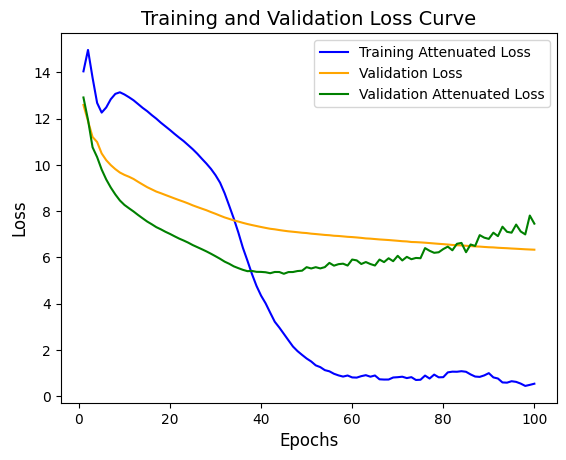

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()